# Repaso (Módulo 2)
> El tema principal en este módulo fueron simulaciones Montecarlo. Al finalizar este módulo, se espera que ustedes tengan las siguientes competencias
> - Evaluar integrales (o encontrar áreas) numéricamente mendiante métodos Montecarlo.
> - Poder replicar fractales aleatorios símples (como los de Barnsley), dadas las características del mismo.
> - Realizar evaluaciones de probabilidad precio-umbral.

## Ejemplo 1. Evaluación numérica de integrales utilizando Montecarlo

- En la clase de evaluación de integrales numéricas por montecarlo vimos dos tipos de evaluación de integrales.
- El tipo 1 se basaba en la definición de valor promedio de una función.
- El tipo 2 se basaba en probabilidades y una variable aleatoria de bernoulli (para encontrar áreas).

En clase desarrollamos funciones para la evaluación de integrales con ambos métodos (explicar porqué la segunda se puede ver como una integral). Las funciones son las siguientes:

In [8]:
def int_montecarlo1(f, a, b, N):
    # Evaluación numérica de integrales por Montecarlo tipo 1
    # f=f(x) es la función a integrar (debe ser declarada previamente) que devuelve para cada x su valor imagen,
    # a y b son los límites inferior y superior del intervalo donde se integrará la función, y N es el número
    # de puntos con que se aproximará.
    return (b-a)/N*np.sum(f(np.random.uniform(a, b, N)))

In [39]:
def int_montecarlo2(region, a1, b1, a2, b2, N):
    # Evaluación numérica de integrales por Montecarlo tipo 2
    # region=region(x,y) retorna True si la coordenada (x,y) pertenece a la región a integrar y False de lo 
    # contrario , a1, b1, a2, b2 son los límites del rectángulo que contiene la región, y N es el número de 
    # puntos con que se aproximará.
    A_R = (b1-a1)*(b2-a2)
    x = np.random.uniform(a1, b1, N.astype(int))
    y = np.random.uniform(a2, b2, N.astype(int))
    return A_R*np.sum(region(x,y))/N

Considere las funciones $f_1(x)=\sqrt{1+x^{4}}$, $f_2(x)=\ln(\ln x)$, $f_3(x)=\frac {1}{\ln x}$, $f_4(x)=e^{e^{x}}$, $f_5(x)=e^{-{\frac {x^{2}}{2}}}$ y $f_6(x)=\sin(x^{2})$.

Utilizar las funciones anteriores para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo $(4,5)$. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.

Hacer una tabla por cada método.

¿Se pueden ver diferencias notables en la velocidad de convergencia de los métodos?

In [10]:
# Importamos librerías
import numpy as np
import pandas as pd
import random

In [11]:
def f1(x):
    return np.sqrt(x**4+1)
def f2(x):
    return np.log(np.log(x))
def f3(x):
    return 1/np.log(x)
def f4(x):
    return np.exp(np.exp(x))
def f5(x):
    return np.exp(-x**2/2)
def f6(x):
    return np.sin(x**2)

In [14]:
a, b = 4, 5
N = np.logspace(1,5,5)
tabla_tipo1 = pd.DataFrame(columns=['$f_1(x)$','$f_2(x)$','$f_3(x)$','$f_4(x)$','$f_5(x)$','$f_6(x)$'], index=N)
tabla_tipo1.index.name = 'Cantidad de términos'

for n in N:
    n = n.astype('int')
    tabla_tipo1.loc[n, '$f_1(x)$'] = int_montecarlo1(f1, a, b, n)
    tabla_tipo1.loc[n, '$f_2(x)$'] = int_montecarlo1(f2, a, b, n)
    tabla_tipo1.loc[n, '$f_3(x)$'] = int_montecarlo1(f3, a, b, n)
    tabla_tipo1.loc[n, '$f_4(x)$'] = int_montecarlo1(f4, a, b, n)
    tabla_tipo1.loc[n, '$f_5(x)$'] = int_montecarlo1(f5, a, b, n)
    tabla_tipo1.loc[n, '$f_6(x)$'] = int_montecarlo1(f6, a, b, n)
    
tabla_tipo1

,$f_1(x)$,$f_2(x)$,$f_3(x)$,$f_4(x)$,$f_5(x)$,$f_6(x)$
Cantidad de términos,,,,,,
10.0,18.8505,0.422384,0.658111,4.42457e+57,8.56257e-05,-0.0457735
100.0,20.4057,0.407287,0.66776,6.16832e+61,9.57619e-05,-0.226611
1000.0,20.3086,0.406436,0.665528,2.48234e+62,7.88172e-05,-0.222007
10000.0,20.3478,0.405587,0.667131,1.9089e+62,7.89024e-05,-0.205277
100000.0,20.365,0.4058,0.667041,2.02239e+62,7.87528e-05,-0.2202


In [47]:
def region1(x,y):
    return y<=f1(x)
def region2(x,y):
    return y<=f2(x)
def region3(x,y):
    return y<=f3(x)
def region4(x,y):
    return y<=f4(x)
def region5(x,y):
    return y<=f5(x)

In [52]:
a1, b1 = 4, 5
a2 = 0
b2 = [26, 0.5, 0.8, 2.86e+64, 0.00036]
N = np.logspace(1,5,5)
tabla_tipo2 = pd.DataFrame(columns=['$f_1(x)$','$f_2(x)$','$f_3(x)$','$f_4(x)$','$f_5(x)$'], index=N)
tabla_tipo2.index.name = 'Cantidad de términos'

for n in N:
    n = n.astype('int')
    tabla_tipo2.loc[n, '$f_1(x)$'] = int_montecarlo2(region1, a1, b1, a2, b2[0], n)
    tabla_tipo2.loc[n, '$f_2(x)$'] = int_montecarlo2(region2, a1, b1, a2, b2[1], n)
    tabla_tipo2.loc[n, '$f_3(x)$'] = int_montecarlo2(region3, a1, b1, a2, b2[2], n)
    tabla_tipo2.loc[n, '$f_4(x)$'] = int_montecarlo2(region4, a1, b1, a2, b2[3], n)
    tabla_tipo2.loc[n, '$f_5(x)$'] = int_montecarlo2(region5, a1, b1, a2, b2[4], n)

tabla_tipo2

,$f_1(x)$,$f_2(x)$,$f_3(x)$,$f_4(x)$,$f_5(x)$
Cantidad de términos,,,,,
10.0,18.2,0.35,0.72,0,0
100.0,20.54,0.38,0.72,0,7.2e-05
1000.0,20.436,0.4055,0.6712,1.43e+62,7.956e-05
10000.0,20.3554,0.4078,0.66832,1.8304e+62,7.848e-05
100000.0,20.3538,0.40635,0.66496,1.92478e+62,7.83684e-05


In [51]:
tabla_tipo1

,$f_1(x)$,$f_2(x)$,$f_3(x)$,$f_4(x)$,$f_5(x)$,$f_6(x)$
Cantidad de términos,,,,,,
10.0,18.8505,0.422384,0.658111,4.42457e+57,8.56257e-05,-0.0457735
100.0,20.4057,0.407287,0.66776,6.16832e+61,9.57619e-05,-0.226611
1000.0,20.3086,0.406436,0.665528,2.48234e+62,7.88172e-05,-0.222007
10000.0,20.3478,0.405587,0.667131,1.9089e+62,7.89024e-05,-0.205277
100000.0,20.365,0.4058,0.667041,2.02239e+62,7.87528e-05,-0.2202


## Ejemplo 2. Fractal aleatorio tipo Barnsley

- En la clase de fractales aleatorios vimos que el fractal helecho de Barnsley se generaba a través de cuatro transformaciones afines que se elegían con cierta probabilidad.
- Vimos que este helecho representaba de manera muy aproximada helechos reales.
- Vimos que modificando parámetros de la tabla, se podían generar mutaciones de el helecho.

Pues bien, usando la misma idea de transformaciones afines que se escogen con cierta probabilidad, se pueden generar una infinidad inimaginable de fractales. Incluso, se pueden generar fractales aleatorios que poseen un atractor determinístico (¿Qué es esto?).

Como en la clase de fractales, repliquemos el fractal tipo Barnsley descrito por la siguiente tabla...

**Referencia:**
- Barnsley, Michael F. *Fractals Everywhere: New Edition*, ISBN: 9780486320342.

In [53]:
import pandas as pd
import numpy as np

In [54]:
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['$a_i$', '$b_i$', '$c_i$', '$d_i$', '$e_i$', '$f_i$', '$p_i$'], dtype='float')
df.index.name = "$i$"

df['$a_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$b_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$c_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$d_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$e_i$'] = [1.0, 50.0, 1.0, 50.0]
df['$f_i$'] = [1.0, 1.0, 50.0, 50.0]
df['$p_i$'] = [0.1, 0.2, 0.3, 0.4]

df.round(2)

,$a_i$,$b_i$,$c_i$,$d_i$,$e_i$,$f_i$,$p_i$
$i$,,,,,,,
0,0.5,0.0,0.0,0.5,1.0,1.0,0.1
1,0.5,0.0,0.0,0.5,50.0,1.0,0.2
2,0.5,0.0,0.0,0.5,1.0,50.0,0.3
3,0.5,0.0,0.0,0.5,50.0,50.0,0.4


### Solución

In [55]:
mat_barnsley = np.array([[0.5, 0.0, 0.0, 0.5, 1.0, 1.0, 0.1], 
                        [0.5, 0.0, 0.0, 0.5, 50.0, 1.0, 0.2],
                        [0.5, 0.0, 0.0, 0.5, 1.0, 50.0, 0.3],
                        [0.5, 0.0, 0.0, 0.5, 50.0, 50.0, 0.4]])
mat_barnsley

array([[  0.5,   0. ,   0. ,   0.5,   1. ,   1. ,   0.1],
       [  0.5,   0. ,   0. ,   0.5,  50. ,   1. ,   0.2],
       [  0.5,   0. ,   0. ,   0.5,   1. ,  50. ,   0.3],
       [  0.5,   0. ,   0. ,   0.5,  50. ,  50. ,   0.4]])

In [56]:
x, y = [0.0], [0.0]

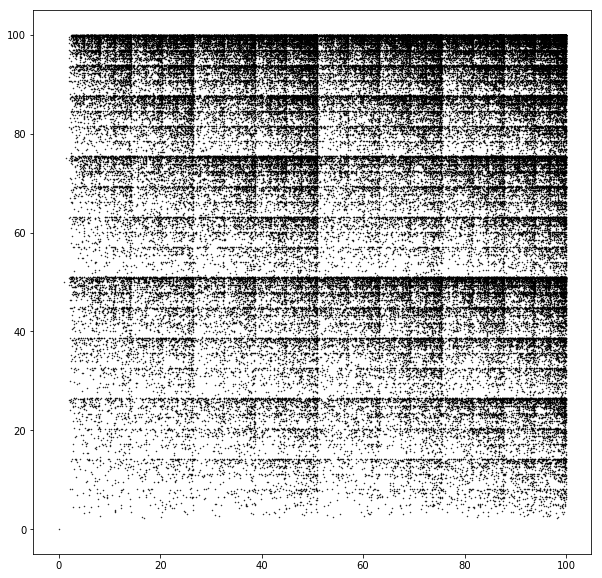

In [62]:
x, y = [0.0], [0.0]
for k in range(100000):
    p = random.random()
    if p <= mat_barnsley[0,6]:
        i = 0
    elif p <= mat_barnsley[0,6]+mat_barnsley[1,6]:
        i = 1
    elif p <= mat_barnsley[0,6]+mat_barnsley[1,6]+mat_barnsley[2,6]:
        i = 2
    else:
        i = 3
        
    x.append(mat_barnsley[i,0]*x[-1]+mat_barnsley[i,1]*y[-1]+mat_barnsley[i,4])
    y.append(mat_barnsley[i,2]*x[-2]+mat_barnsley[i,3]*y[-1]+mat_barnsley[i,5])

plt.figure(figsize=(10,10))
plt.scatter(x,y, c='k', s = 0.2)
plt.show()

# Recordar que el viernes deben subir a moodle un notebook con el nombre, intro y objetivos del proyecto.
# El viernes repasaremos la aplicación de probabilidad precio-umbral.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>